### Project Four by Pritom Bhowmik

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras import layers
import numpy as np

In [2]:
# Import Dataset
df = pd.read_csv('vehicles.csv')

In [3]:
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


### Data Cleansing

In [4]:
# Removing unrelated column
column_to_drop = ['id', 'url', 'region', 'region_url','image_url','description', 'county', 'lat', 'size','long', 'state', 'posting_date', 'VIN','model']
df_cleaned = df.drop(column_to_drop, axis=1)

In [5]:
df_cleaned.head(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Removeing Row having Null Values
df_cleaned = df_cleaned.dropna()

In [7]:
df_cleaned.head(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black
32,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black
33,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver
34,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey
35,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red
36,38590,2011.0,chevrolet,good,8 cylinders,gas,30237.0,clean,other,rwd,other,red
38,32990,2017.0,jeep,good,6 cylinders,gas,30041.0,clean,other,4wd,other,silver
42,37990,2016.0,chevrolet,good,8 cylinders,gas,9704.0,clean,other,rwd,coupe,red
45,27990,2018.0,nissan,good,6 cylinders,gas,37332.0,clean,other,4wd,pickup,silver
55,19900,2004.0,ford,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,pickup,blue


In [8]:
# Remove Rows where Price is Zero
df_cleaned = df_cleaned[df_cleaned['price'] != 0]

In [9]:
df_cleaned.head(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black
32,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black
33,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver
34,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey
35,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red
36,38590,2011.0,chevrolet,good,8 cylinders,gas,30237.0,clean,other,rwd,other,red
38,32990,2017.0,jeep,good,6 cylinders,gas,30041.0,clean,other,4wd,other,silver
42,37990,2016.0,chevrolet,good,8 cylinders,gas,9704.0,clean,other,rwd,coupe,red
45,27990,2018.0,nissan,good,6 cylinders,gas,37332.0,clean,other,4wd,pickup,silver
55,19900,2004.0,ford,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,pickup,blue


In [10]:
# Remove String from cylinders Column
df_cleaned['cylinders'] = df_cleaned['cylinders'].str.extract('(\d+)')
df_cleaned['cylinders'] = pd.to_numeric(df_cleaned['cylinders'], errors='coerce')

In [11]:
df_cleaned.head(100)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
31,15000,2013.0,ford,excellent,6.0,gas,128000.0,clean,automatic,rwd,truck,black
32,27990,2012.0,gmc,good,8.0,gas,68696.0,clean,other,4wd,pickup,black
33,34590,2016.0,chevrolet,good,6.0,gas,29499.0,clean,other,4wd,pickup,silver
34,35000,2019.0,toyota,excellent,6.0,gas,43000.0,clean,automatic,4wd,truck,grey
35,29990,2016.0,chevrolet,good,6.0,gas,17302.0,clean,other,4wd,pickup,red
...,...,...,...,...,...,...,...,...,...,...,...,...
398,3500,1994.0,ford,fair,8.0,diesel,190000.0,clean,manual,rwd,truck,white
403,36990,2018.0,toyota,good,6.0,gas,21415.0,clean,other,4wd,other,silver
406,30990,2017.0,nissan,good,6.0,gas,31095.0,clean,other,4wd,pickup,white
409,16000,2016.0,dodge,like new,6.0,gas,62000.0,clean,automatic,rwd,sedan,silver


In [12]:
print(df_cleaned.dtypes)

price             int64
year            float64
manufacturer     object
condition        object
cylinders       float64
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
dtype: object


In [13]:

total_rows = df_cleaned.shape[0]

print("Total number of rows:", total_rows)


Total number of rows: 112796


In [108]:

# Convert 'odometer' column to float type
df_cleaned['odometer'] = df_cleaned['odometer'].astype(float)

# Drop rows with NaN values
df_cleaned = df_cleaned.dropna(subset=['cylinders'])

# Scale the target variable
max_price = df_cleaned['price'].max()
min_price = df_cleaned['price'].min()
df_cleaned['price'] = (df_cleaned['price'] - min_price) / (max_price - min_price)

# Split the data into features (X) and target variable (y)
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numeric_features = ['year', 'cylinders', 'odometer']
categorical_features = ['condition', 'fuel', 'title_status', 'transmission', 'drive', 'manufacturer', 'type', 'paint_color']

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform the training and testing data to dense arrays
X_train_transformed = preprocessor.fit_transform(X_train).toarray()
X_test_transformed = preprocessor.transform(X_test).toarray()

# Build the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train_transformed.shape[1],)),  # Input layer
    layers.Dense(128, activation='relu'),      # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'),       # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                            # Output layer with 1 neuron (regression task)
])

# Compile the model with a lower learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')


# Print model summary to inspect architecture
model.summary()

# Train the model
history = model.fit(X_train_transformed, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test_transformed, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Save the model
model.save('model_path')


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 128)               12032     
                                                                 
 dense_82 (Dense)            (None, 64)                8256      
                                                                 
 dense_83 (Dense)            (None, 1)                 65        
                                                                 
Total params: 20353 (79.50 KB)
Trainable params: 20353 (79.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
2250/2250 [==============================] - 16s 7ms/step - loss: 0.0015 - val_loss: 8.8282e-04
Epoch 2/20
2250/2250 [==============================] - 12s 5ms/step - loss: 4.0450e-04 - val_loss: 1.5663e-04
Epoch 3/20
2250/2250 [==============================] - 11s 5ms

INFO:tensorflow:Assets written to: model_path\assets


In [118]:

df_new_data = pd.DataFrame({
    'year': [2020],
    'condition': ['excellent'],
    'cylinders': [4.0],
    'fuel': ['gas'],
    'odometer': [600.0],
    'title_status': ['clean'],
    'transmission': ['automatic'],
    'drive': ['rwd'],
    'manufacturer': ['ford'],
    'type': ['truck'],
    'paint_color': ['black']
})

df_new_data['odometer'] = df_new_data['odometer'].astype(float)
X_new_data_transformed = preprocessor.transform(df_new_data).toarray()

predictions_new_data = model.predict(X_new_data_transformed)

# Print the predicted prices
predicted_prices = (predictions_new_data.flatten() * 100000000).astype(int)
print("Predicted Prices:")
print(predicted_prices)


1/1 [==============================] - 0s 52ms/step
Predicted Prices:
[11209]


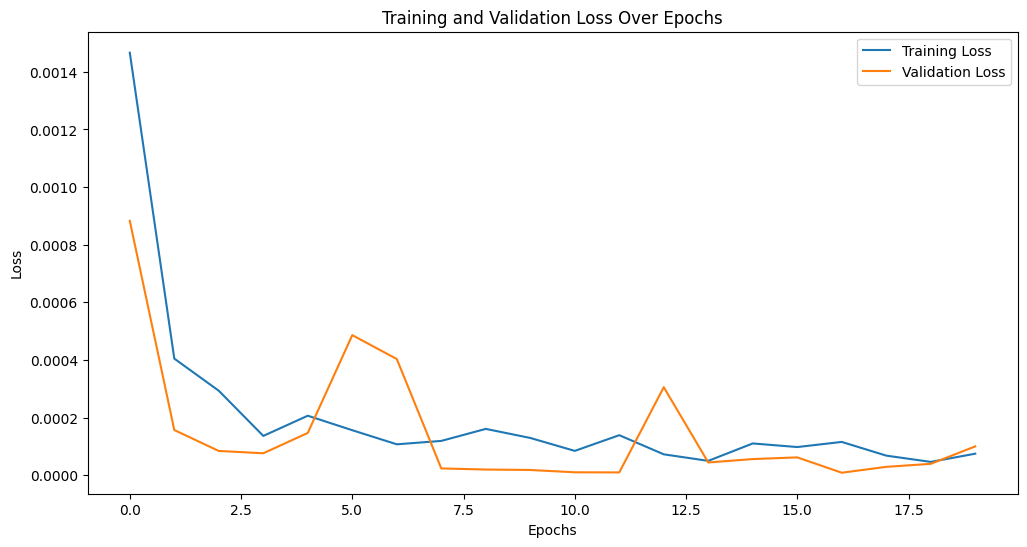

In [114]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

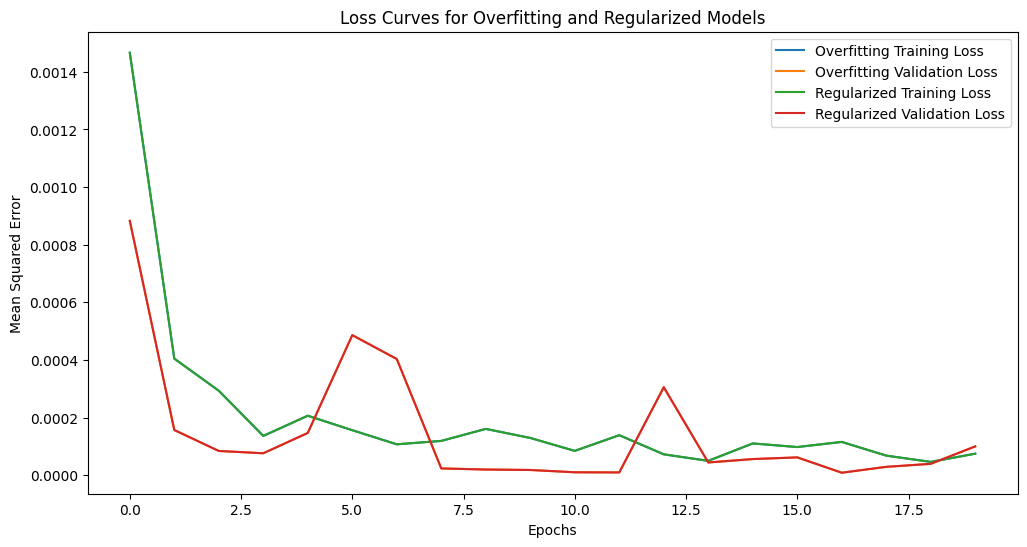

In [116]:
# Plot loss curves for overfitting model and regularized model
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Overfitting Training Loss')
plt.plot(history.history['val_loss'], label='Overfitting Validation Loss')
plt.plot(history.history['loss'], label='Regularized Training Loss')
plt.plot(history.history['val_loss'], label='Regularized Validation Loss')
plt.title('Loss Curves for Overfitting and Regularized Models')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [115]:
loss = model.evaluate(X_test_transformed, y_test)
print(f'Mean Squared Error on Test Set: {loss}')
model.save('model_path')


704/704 [==============================] - 1s 1ms/step - loss: 1.3014e-04
Mean Squared Error on Test Set: 0.00013013827265240252
INFO:tensorflow:Assets written to: model_path\assets


INFO:tensorflow:Assets written to: model_path\assets


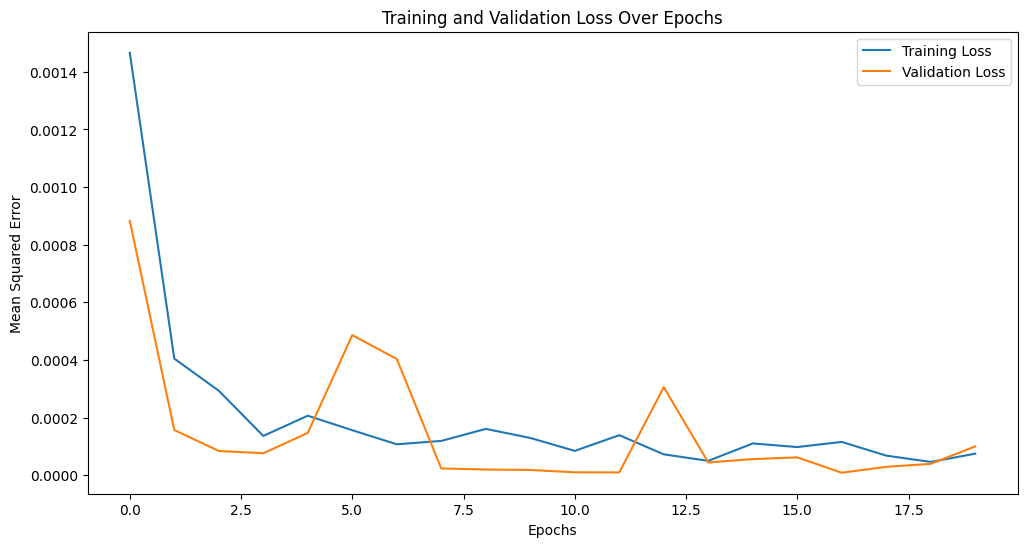

In [117]:
# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()